<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>


# **실습: 이변량 분석 ② - 범주형  → 수치형**

## **1. 환경준비**

In [1]:
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (6, 4)

In [2]:
# CarSeat 데이터
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/Carseats.csv'
carseat = pd.read_csv(path)
carseat.drop('Education', axis=1, inplace=True)
carseat.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


**📋 데이터 정보**

- Sales: 각 지역 판매량(단위: 1,000개)
- CompPrice: 경쟁사 가격(단위: 달러)
- Income: 지역 평균 소득(단위: 1,000달러)
- Advertising: 각 지역, 회사의 광고 예산(단위: 1,000달러)
- Population: 지역 인구수(단위: 1,000명)
- Price: 자사 지역별 판매 가격
- ShelveLoc: 진열 상태
- Age: 지역 인구의 평균 연령
- Urban: 도심 지역 여부(Yes, No)
- US: 매장이 미국에 있는지 여부(Yes, No)

## **2. 시각화**

- 다음 두 변수들 간의 관계를 평균 Bar Plot과 Box Plot으로 시각화해 확인하세요.

**1️⃣ 국내외 여부(US) → 판매량(Sales)**


- 평균 Bar Plot


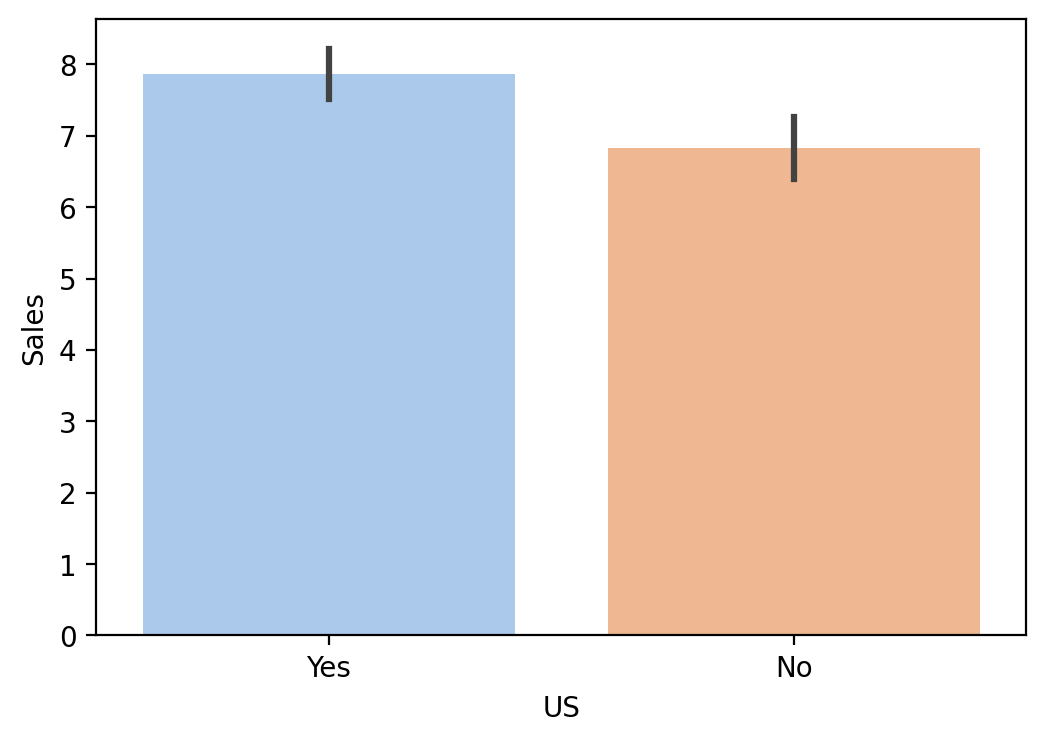

In [13]:
sns.barplot(x='US', y='Sales', data=carseat, palette='pastel')
plt.show()

- Box Plot

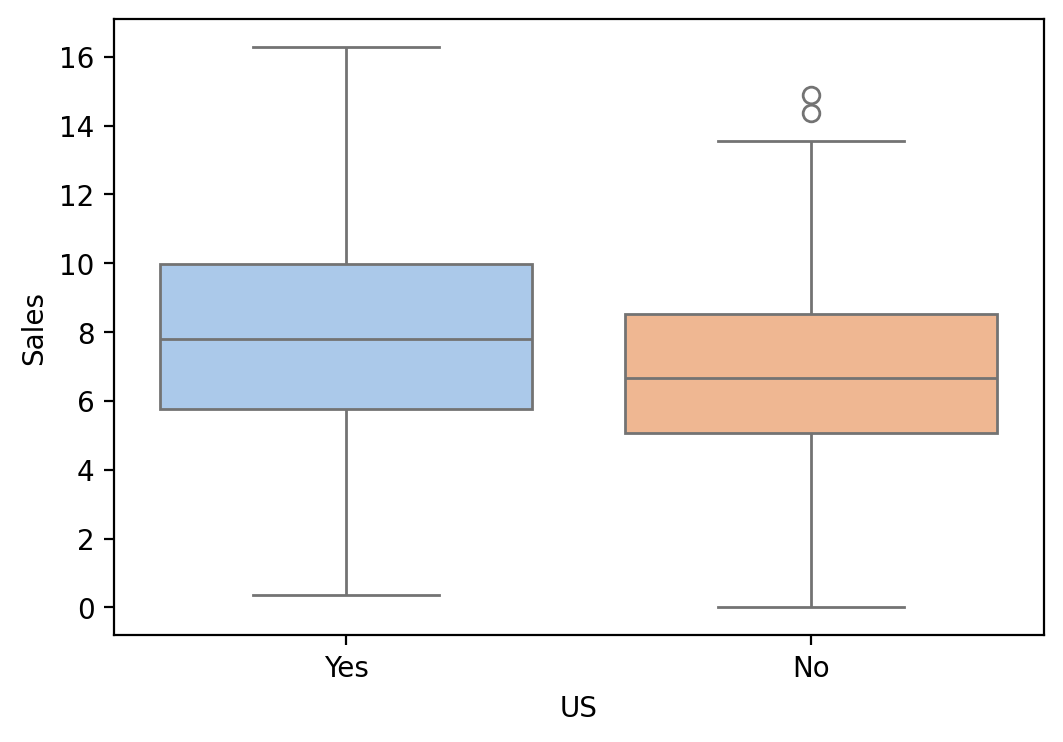

In [14]:
sns.boxplot(x='US', y='Sales', data=carseat, palette='pastel')
plt.show()

- **질문:** 국내외 여부(US)별 판매량(Sales)평균에 차이가 있나요?

In [3]:
# 

**2️⃣ 도심지역 여부(Urban) → 판매량(Sales)**


- 평균 Bar Plot

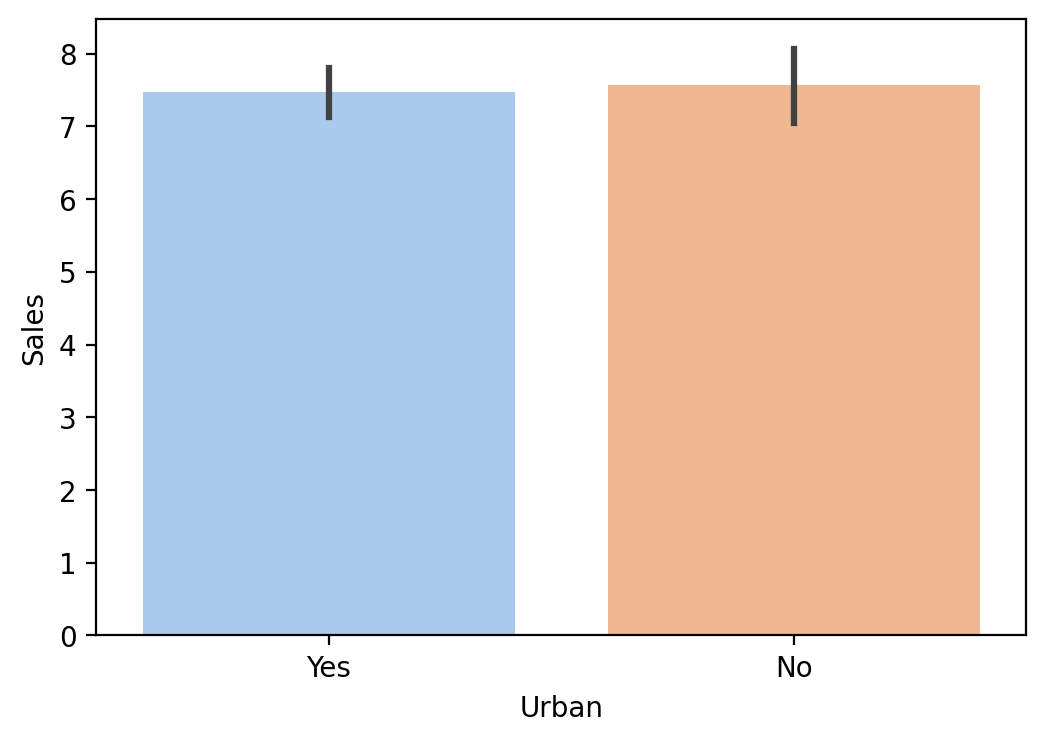

In [15]:
sns.barplot(x='Urban', y='Sales', data=carseat, palette='pastel')
plt.show()

- Box Plot

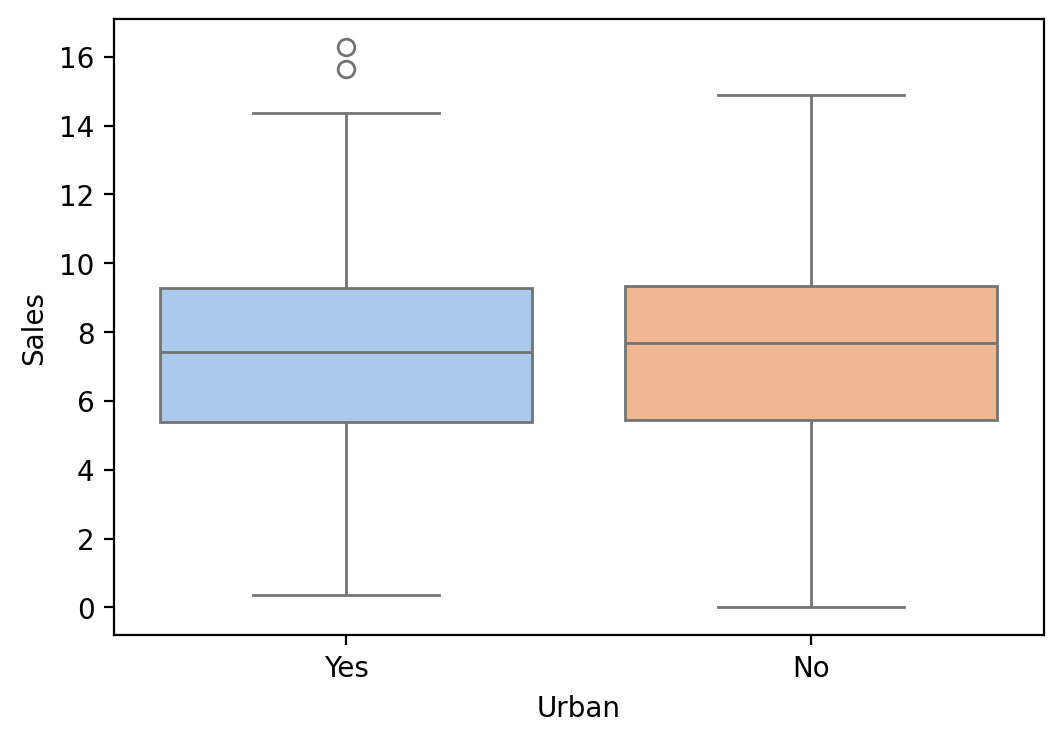

In [17]:
sns.boxplot(x='Urban', y='Sales', data=carseat, palette='pastel')
plt.show()

- **질문:** 도심지역 여부(Urban)별 판매량(Sales)평균에 차이가 있나요?

In [4]:
# 

**3️⃣ 진열 상태(ShelveLoc) → 판매량(Sales)**


- 평균 Bar Plot

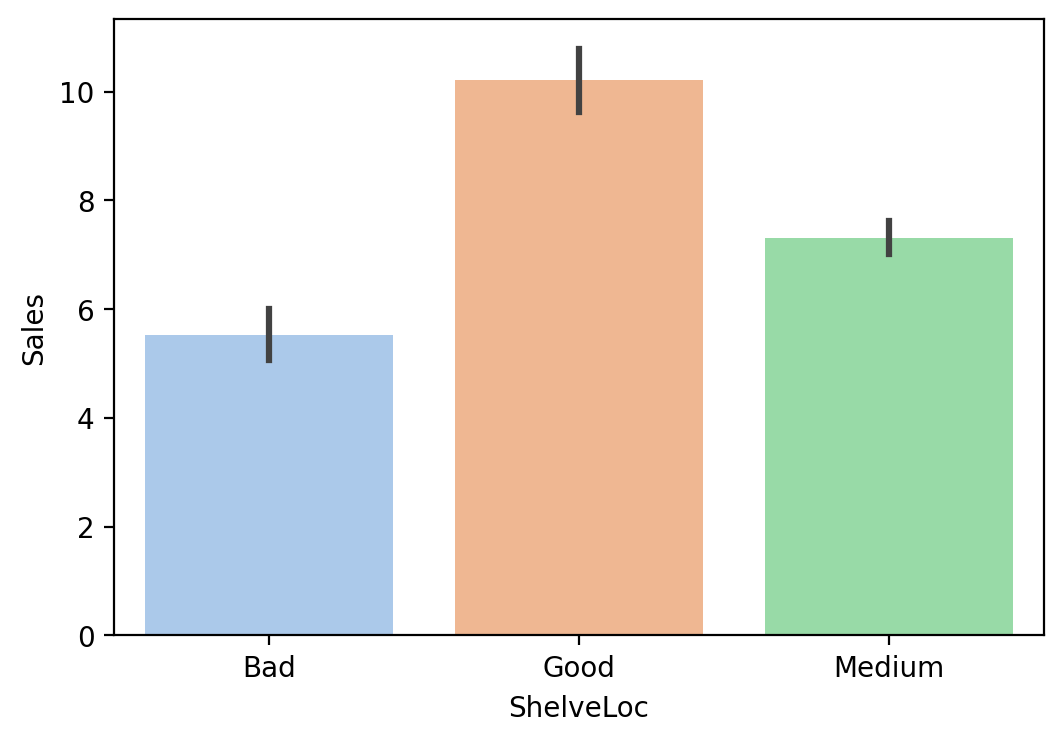

In [16]:
sns.barplot(x='ShelveLoc', y='Sales', data=carseat, palette='pastel')
plt.show()

- Box Plot

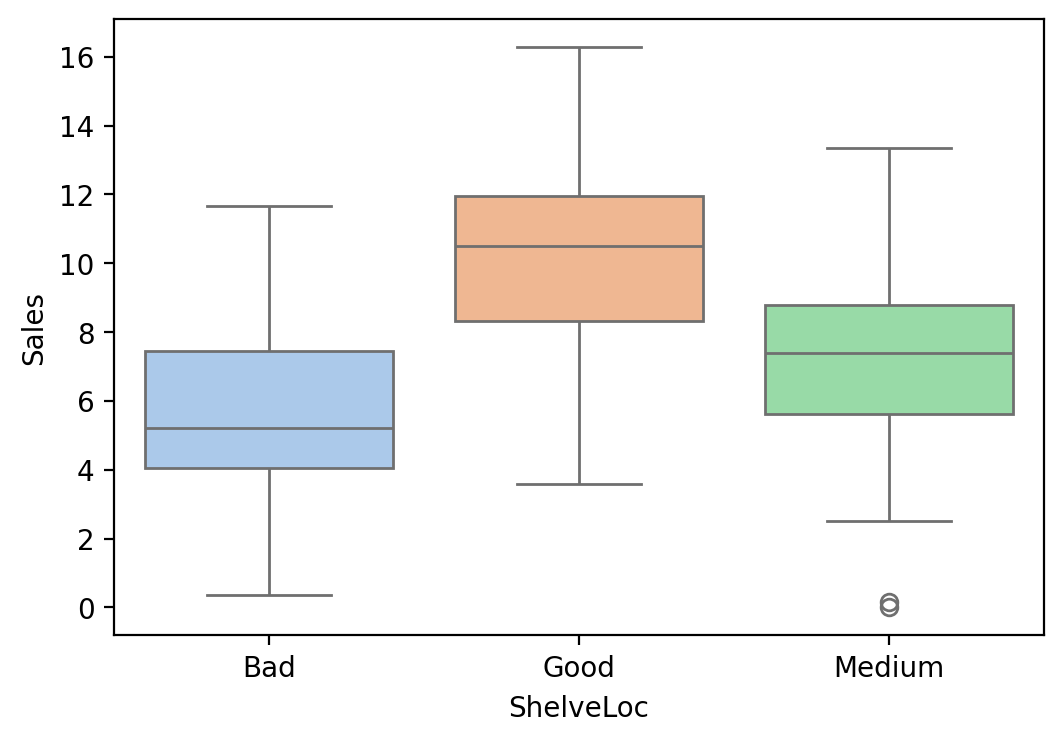

In [18]:
sns.boxplot(x='ShelveLoc', y='Sales', data=carseat, palette='pastel')
plt.show()

- **질문:** 진열 상태(ShelveLoc)별 판매량(Sales) 평균에 차이가 있나요?

In [5]:
# 

## **3. 수치화**

- 다음 두 변수들 간의 관계를 t-검정 또는 분산분석으로 수치화해 확인하세요.

**1️⃣ 국내외 여부(US) → 판매량(Sales)**

In [19]:
carseat.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Urban          0
US             0
dtype: int64

In [21]:
carseat['US'].value_counts()

US
Yes    258
No     142
Name: count, dtype: int64

In [22]:
yes = carseat.loc[carseat['US']=='Yes', 'Sales']
no = carseat.loc[carseat['US']=='No', 'Sales']

t_test = spst.ttest_ind(yes, no)

print('* t-statistic:', t_test[0])
print('* p-value:', t_test[1])

* t-statistic: 3.589738747802499
* p-value: 0.00037233958701471517


- **질문:** t-검정 결과를 해석해 보세요.

In [6]:
# 

**2️⃣ 도심지역 여부(Urban) → 판매량(Sales)**

In [23]:
carseat['Urban'].value_counts()

Urban
Yes    282
No     118
Name: count, dtype: int64

In [24]:
yes = carseat.loc[carseat['Urban']=='Yes', 'Sales']
no = carseat.loc[carseat['Urban']=='No', 'Sales']

t_test = spst.ttest_ind(yes, no)

print('* t-statistic:', t_test[0])
print('* p-value:', t_test[1])

* t-statistic: -0.30765346670661126
* p-value: 0.7585069603942775


- **질문:** t-검정 결과를 해석해 보세요.

In [7]:
#

**3️⃣ 진열 상태(ShelveLoc) → 판매량(Sales)**

In [25]:
carseat['ShelveLoc'].value_counts()

ShelveLoc
Medium    219
Bad        96
Good       85
Name: count, dtype: int64

In [27]:
medi = carseat.loc[carseat['ShelveLoc']=='Medium', 'Sales']
bad = carseat.loc[carseat['ShelveLoc']=='Bad', 'Sales']
good = carseat.loc[carseat['ShelveLoc']=='Good', 'Sales']

anova = spst.f_oneway(medi, bad, good)

print('* f-statistic:', anova[0])
print('* p-value:', anova[1])

* f-statistic: 92.22990509910348
* p-value: 1.26693609015938e-33


- **질문:** ANOVA 결과를 해석해 보세요.

In [8]:
# 